# HW 11 – Boosting

# Random Forest and Boosting – Regression

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [64]:
rand_state = 1000

In [65]:
df=pd.read_csv('bikeshare.csv')

In [66]:
df.head(10)

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1
5,1,0,1,5,0,6,1,2,-1.334609,0.636351,-0.821460,2011-01-01,1
6,1,0,1,6,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,2
7,1,0,1,7,0,6,1,1,-1.542341,1.206507,-1.553844,2011-01-01,3
8,1,0,1,8,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,8
9,1,0,1,9,0,6,1,1,-0.919146,0.688184,-1.553844,2011-01-01,14


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [68]:
df.drop('dteday', axis=1, inplace=True)

In [69]:
ordinal_categorical = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday', 'weathersit']

In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
enc = OrdinalEncoder()

In [72]:
df[ordinal_categorical]= enc.fit_transform(df[ordinal_categorical])

In [73]:
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,cnt
0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,-1.334609,0.947345,-1.553844,16
1,0.0,0.0,0.0,1.0,0.0,6.0,1.0,0.0,-1.438475,0.895513,-1.553844,40
2,0.0,0.0,0.0,2.0,0.0,6.0,1.0,0.0,-1.438475,0.895513,-1.553844,32
3,0.0,0.0,0.0,3.0,0.0,6.0,1.0,0.0,-1.334609,0.636351,-1.553844,13
4,0.0,0.0,0.0,4.0,0.0,6.0,1.0,0.0,-1.334609,0.636351,-1.553844,1


In [74]:
enc.categories_

[array([1, 2, 3, 4]),
 array([0, 1]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([0, 1]),
 array([1, 2, 3, 4])]

### 1. Define your feature space and target variables. Split the data into test (30%) and train set (70%)

In [75]:
y = df['cnt']
X = df.drop('cnt', axis=1) 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

### 2. From sklearn.ensemble import the relevant function for RF regression. Do the followings: 

#### 1. Train the model with the default features. However use random_state=1000.

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
# Fitting RF regression to the Training set
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

#### 2. Make predictions on the test set and save them as y_hat

In [78]:
# Predicting the Test set results
y_hat = RF_regression.predict(X_test)

#### 3. Construct a data frame named df_predictions with 2 columns. y_test, and y_hat  from previous part

In [79]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4495,26,21.38
4418,47,64.21
7141,11,4.91
14765,205,199.84
16541,65,80.55


#### 4. Visualize actual vs predicted counts in the test set using an scatterplot. Are you visually satisfied with the regression model?

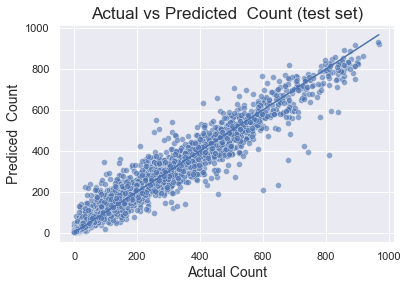

In [80]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual Count', fontsize=14)
plt.ylabel('Prediced  Count', fontsize=14)
plt.title('Actual vs Predicted  Count (test set)', fontsize=17)
plt.show()

I am satisfied with the visualization. The regression line follows the pattern of the data very well. 

#### 5. Report the R-squared and RMSE_test for the RFF regression model.

In [81]:
np.round(RF_regression.score(X_test, y_test),4)

0.9488

In [82]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

41.82

The R-squared is 0.9488 and the RMSE_test is 41.82

### 3. Tuning hyperparameters: 
#### I specifically want you to use the following param_grid. my_param_grid = {'n_estimators':[100,200], 'max_features':['log2', 'auto'], 'max_depth':[10,None]} . Where you able to improve the model performance? Is random forest using a small tree or bushy tree? How do yo know?

In [83]:
my_param_grid = {'n_estimators':[100,200], 'max_features':['log2', 'auto'], 'max_depth':[10,None]}

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

In [86]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.7s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.7s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.7s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.7s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   0.7s
[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=10, max_features=log2, n_estimators=200; total time=   1.5s
[CV] END ..max_depth=10, max_features=auto, n_estimators=100; total time=   2.0s
[CV] END ..max_depth=10, max_features=auto, n_est

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1000),
             param_grid={'max_depth': [10, None],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [100, 200]},
             verbose=2)

In [87]:
grid.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}

In [88]:
grid.best_estimator_

RandomForestRegressor(n_estimators=200, random_state=1000)

In [89]:
y_hat_optimized = grid.predict(X_test)

In [90]:
predictions['y_hat_optimized'] = y_hat_optimized
predictions.head()

,y_test,y_hat,y_hat_optimized
4495,26,21.38,21.100
4418,47,64.21,64.585
7141,11,4.91,4.905
14765,205,199.84,200.480
16541,65,80.55,76.010


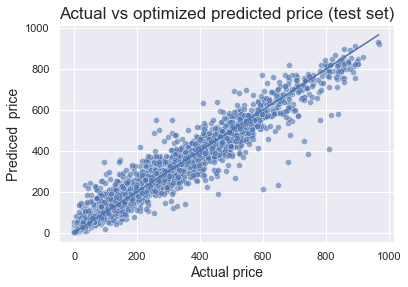

In [91]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual price', fontsize=14)
plt.ylabel('Prediced  price', fontsize=14)
plt.title('Actual vs optimized predicted price (test set)', fontsize=17)
plt.show()

In [92]:
np.round(grid.score(X_test, y_test),4)

0.9487

In [93]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

41.85

Before we used the grid search we had: 
    R-squared: 0.9488 and RMSE_test: 41.82

After the grid search: 
    R-sqaured: 0.9487 and RMSE_test_opt: 41.85
    
This isn't really much of an improvement. 


Random Forest is using a ___ (small or bushy) tree because .... 

### 4. Cross validation and OOB observations: estimate the R2 of the test set using both CV and OOB methods and compare the results.

**Cross Validation**

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [96]:
R2_CV = round(np.mean(R2),4)
R2_CV

0.8963

**Out-of-Bag errors**

In [97]:
np.random.choice(100,size=100)

array([74, 57, 68, 44, 34, 22, 71, 87, 42, 14,  7, 83, 33,  7, 71, 94, 64,
       15, 25, 96, 16, 88, 39, 23, 33, 54, 60, 58, 97, 32, 58, 65, 96, 74,
       82, 61, 40, 78, 55, 36, 87, 58, 91, 77, 12,  1, 51, 47, 13, 47, 19,
       37, 42, 47, 52, 76, 44, 77, 39, 60, 58, 23, 96, 79, 66, 75, 26, 20,
       94,  1, 14, 62,  0, 89, 55,  2, 67,  5, 57, 39, 37, 10,  1,  5, 58,
       90, 34, 73, 75, 17, 55, 62, 87, 45, 55, 65, 25, 83, 78, 67])

In [98]:
np.unique(np.random.choice (100,size=100)).size

64

In [99]:
RF_oob = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      oob_score=True)

In [100]:
RF_oob.oob_score_

0.9072892973572317

R-squared from the cross validation is 0.8959. The R-squared from the OOB method is 0.9053.

### 5. Feature importance: 
#### Plot the feature importance graph and compare your top 5 important features with the top 5 most significant variables derived from a linear regression model.  Can you name a variable which was important according to RF but not significant according to linear regression model? What's going on here?

In [101]:
features = list(X_train.columns)
features

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'notbizday',
 'weathersit',
 'temp',
 'hum',
 'windspeed']

In [102]:
RF_Regressor = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [103]:
importance = RF_Regressor.feature_importances_
importance

array([0.04019892, 0.07052285, 0.0437904 , 0.47789922, 0.00290958,
       0.03678655, 0.03079878, 0.0205904 , 0.13488911, 0.10172075,
       0.03989344])

In [104]:
FIM = pd.DataFrame({'Features': features, 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
4,holiday,0.002910
7,weathersit,0.020590
6,notbizday,0.030799
5,weekday,0.036787
10,windspeed,0.039893
0,season,0.040199
2,mnth,0.043790
1,yr,0.070523
9,hum,0.101721
8,temp,0.134889


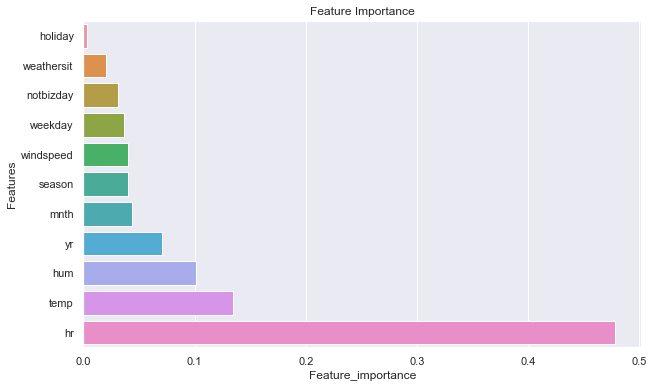

In [105]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

In [106]:
import statsmodels.api as sm

In [107]:
# With statsmodels, we need to mannually add a constant to our dataset!
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [108]:
# Fit the model
model = sm.OLS(y_train,X_train_wc)
statsmodels_reg= model.fit()

In [109]:
statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     691.2
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:03:45   Log-Likelihood:                -77471.
No. Observations:               12165   AIC:                         1.550e+05
Df Residuals:                   12153   BIC:                         1.551e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2885      4.237      7.384      0.000      22.982      39.595
season        19.3442      2.114      9.149      0.000      15.199      23.489
yr            80.3554      2.576     31.191      0.000      75.306      85.405
mnth           0.0406      0.658      0.062      0.951      -1.249       1.330
hr             7.4540      0.196     38.014      0.000       7.070       7.838
holiday      -23.9886      7.879     -3.045      0.002     -39.432      -8.545
weekday        1.7031      0.643      2.649      0.008       0.443       2.964
notbizday     -2.4919      2.857     -0.872      0.383      -8.093       3.109
weathersit    -3.5995      2.274     -1.583      0.113      -8.057       0.858
temp          54.3312      1.378     39.424      0.000      51.630      57.033
hum          -37.7405      1.578    -23.919      0.000     -40.833     -34.648
windspeed      4.7366      1.362      3.477      0.001       2.066       7.407
==============================================================================
Omnibus:                     2452.232   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4830.463
Skew:                           1.219   Prob(JB):                         0.00
Kurtosis:                       4.893   Cond. No.                         91.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6. Train 3 different boosting regressors (AdaBoost, GBM and XGBoost) using their default model inputs. Compare the performance of the 3 boosting regressors  with the vanilla Random Forest model (not the optimized one) by reporting the scores (R-squared in the test set) among the four models.

In [110]:
from sklearn.ensemble import RandomForestRegressor # we will be using RF as our benchmark.

In [111]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [112]:
from xgboost import XGBRegressor

##### Random Forest

In [113]:
%%time 
# Fitting RF Regressor to the Training set
RF_regressor = RandomForestRegressor(random_state=rand_state)
RF_regressor.fit(X_train, y_train)

CPU times: user 4.96 s, sys: 339 ms, total: 5.29 s
Wall time: 4.16 s


RandomForestRegressor(random_state=1000)

##### AdaBoost

In [114]:
%%time
# Fitting AdaBoost Regressor to the Training set
AdB_regressor = AdaBoostRegressor(random_state=rand_state)
AdB_regressor.fit(X_train, y_train)

CPU times: user 689 ms, sys: 5.1 ms, total: 694 ms
Wall time: 692 ms


AdaBoostRegressor(random_state=1000)

##### GBM

In [115]:
%%time 
# Fitting Gradient Boosting classifier to the Training set
GBM_regressor = GradientBoostingRegressor(random_state=rand_state)
GBM_regressor.fit(X_train, y_train)

CPU times: user 1.18 s, sys: 7.84 ms, total: 1.19 s
Wall time: 1.2 s


GradientBoostingRegressor(random_state=1000)

##### XGBoost

In [116]:
%%time 
# Fitting XGBoost regressor to the Training set
XGB_regressor = XGBRegressor(random_state=rand_state)
XGB_regressor.fit(X_train, y_train)

CPU times: user 4.26 s, sys: 373 ms, total: 4.64 s
Wall time: 602 ms


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=1000,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
y_hat_RF       = RF_regressor.predict(X_test)
y_hat_AdB      = AdB_regressor.predict(X_test)
y_hat_GBM      = GBM_regressor.predict(X_test)
y_hat_XGB      = XGB_regressor.predict(X_test)

In [118]:
print('RF  R-Squared = {}'.format(np.round(RF_regressor.score(X_test, y_test),4)))
print('AdB R-Squared = {}'.format(np.round(AdB_regressor.score(X_test, y_test),4)))
print('GBM R-Squared = {}'.format(np.round(GBM_regressor.score(X_test, y_test),4)))
print('XGB R-Squared = {}'.format(np.round(XGB_regressor.score(X_test, y_test),4)))

RF  R-Squared = 0.9488
AdB R-Squared = 0.6656
GBM R-Squared = 0.8563
XGB R-Squared = 0.9516


**Execution Speed ranked best to worst:**

1. EXBoost: 599 ms
2. AdaBoost: 686 ms
3. GBM: 1.12 s
4. Random Forest: 4.16 s


**Performance ranked best to worst:**

1. ExBoost R-Squared : 0.9516
2. Random Forest R-Squared: 0.9488
3. GBM R-Squared: 0.8563
4. AdaBoost R-Squared: 0.6656

Overall, EGBoost is the winner, because it had has the highest R-squared and it was the fastest. 

# Random Forest and Boosting – Classification

### 1. Define a binary target variable overload. Overload=1 if cnt>500 and 0 otherwise. What are the proportions of overload vs non-overload in your data set? Is the target variable balanced or imbalanced? 

In [119]:
df['overload']= np.where(df['cnt']>500, 1, 0)

In [120]:
df.drop('cnt', axis=1, inplace=True)

In [121]:
pd.crosstab(df['overload'],df['overload'], normalize='all')*100

overload,0,1
overload,,
0,92.640543,0.000000
1,0.000000,7.359457


92.6% of the dataset is classified as non-overload, and 7.4% of the dataset is classified as overload. This means that the target variable overload is imbalanced!

### 2. Along with the target variable, define your feature space (X) and split the data into test (30%) and train set (70%)

In [122]:
y = df['overload']
X = df.drop(['overload'], axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

### 3. From sklearn.ensemble import the relevant function for RF classification. Do the followings:

#### 1. Train the RF classification model using its default parameters. However use random_state=1000. 

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train)

RandomForestClassifier()

#### 2. Generate the predicted probabilities and predicted classifications and save them as y_hat_probs, y_hat respectively.

In [125]:
# Predicting the Test set probabilities and classes
y_hat      = RF_classifier.predict(X_test)
y_hat_probs = RF_classifier.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. we saved the prob of purchased!

#### 3. Plot the histogram of y_hat_probs? Explain what you see? Is there a probability threshold at which the model always predict negative or positive?

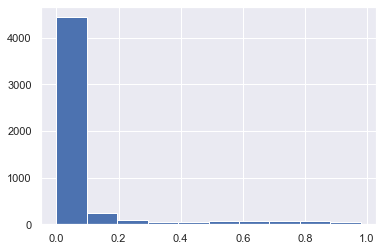

In [126]:
plt.hist(y_hat_probs)
plt.show()

The histogram is mainly concentrated to the left. This shows us that the data set is pretty imbalanced. Below a threshold of 0.3 the model will almost always predict negative. 

#### 4. Use the built-in classification report function from sklearn. Report the Accuracy, precision, recall and f1 score along with the confusion matrix. Interpret all of these statistics. Do you trust the accuracy of the model? why?

In [127]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [128]:
print(confusion_matrix(y_test, y_hat))

[[4783   36]
 [ 105  290]]


In [129]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4819
           1       0.89      0.73      0.80       395

    accuracy                           0.97      5214
   macro avg       0.93      0.86      0.89      5214
weighted avg       0.97      0.97      0.97      5214



I would not trust the accuracy of the model, because the data set is very imbalanced. 

### 4. Tuning hyperparameters: 
#### I specifically want you to use the following param_grid. my_param_grid = {'n_estimators':[100,200], 'criterion':['gini','entropy'],  'max_features':['log2', 'auto'], 'max_depth':[10,None]} . Where you able to improve the model performance? Is random forest using a small tree or bushy tree? How do yo know? 

In [130]:
my_param_grid = {'n_estimators':[100,200], 'criterion':['gini','entropy'],  'max_features':['log2', 'auto'], 'max_depth':[10,None]}

In [131]:
from sklearn.model_selection import GridSearchCV

In [132]:
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [133]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=100; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200; total time=   1.2s
[CV] END criterion=gini, max_depth=10, max_features=log2, n_estimators=200; total ti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1000),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, None],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [100, 200]},
             verbose=2)

In [134]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 100}

In [135]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=1000)

In [136]:
y_hat_optimized = grid.predict(X_test)

In [137]:
print(confusion_matrix(y_test, y_hat_optimized))

[[4782   37]
 [ 100  295]]


In [138]:
print(classification_report(y_test, y_hat_optimized))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4819
           1       0.89      0.75      0.81       395

    accuracy                           0.97      5214
   macro avg       0.93      0.87      0.90      5214
weighted avg       0.97      0.97      0.97      5214



We were able to improve the tree. The tree is ______ (small/bushy) because..

### 5. Cross validation and OOB observations: estimate the accuracy of the test set using both CV and OOB methods and compare the results. 

**Cross Validation**

In [139]:
from sklearn.model_selection import cross_val_score

In [140]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [141]:
R2_CV = round(np.mean(R2),4)
R2_CV

0.688

**OOB**

In [142]:
np.random.choice(100,size=100)

array([54, 12, 36, 46, 91, 82, 22, 53, 67, 62, 39, 45, 29,  9, 97, 97, 21,
        0, 30, 86, 69,  4,  5, 42, 31, 84, 71, 77, 37, 87, 26, 22, 99, 10,
       56, 85, 67, 22, 24,  2, 86, 68, 60, 62, 52, 87, 45, 60, 99, 55, 79,
        0, 38, 34,  2,  6, 85, 37, 68, 72, 52, 88, 21, 60, 49, 52,  1, 91,
       44, 57, 54, 83,  2, 65, 94, 75, 34, 43, 73, 86, 70, 31, 13, 66, 91,
       28, 38, 81, 80, 92, 73, 86, 46, 63,  0, 43, 65,  6, 97, 50])

In [143]:
np.unique(np.random.choice (100,size=100)).size

54

In [144]:
RF_oob = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      oob_score=True)

In [145]:
RF_oob.oob_score_

0.7064066974048782

R-squared from the cross validation is 0.6874. The R-squared from the OOB method is 0.7065.

### 6. Dealing with imbalanced data: Use the balanced version of RF classifier and save the predictions as y_hat_balanced. Report the precision, recall and f1 score for the balanced RF versus what you found in part 3.4. What happened to recall? does that make sense? 

In [146]:
pd.crosstab(df['overload'],df['overload'], normalize='all')*100

overload,0,1
overload,,
0,92.640543,0.000000
1,0.000000,7.359457


In [147]:
RF_balanced = RandomForestClassifier(random_state=1000, criterion='entropy', max_features='log2', max_depth=10, class_weight='balanced_subsample')

In [148]:
y_hat_balanced = RF_balanced.fit(X_train, y_train).predict(X_test)

In [149]:
print(confusion_matrix(y_test, y_hat_balanced))

[[4384  435]
 [  28  367]]


In [150]:
print(classification_report(y_test, y_hat_balanced))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4819
           1       0.46      0.93      0.61       395

    accuracy                           0.91      5214
   macro avg       0.73      0.92      0.78      5214
weighted avg       0.95      0.91      0.92      5214



### 7. Plot the ROC curve for the balanced RF and report the AUC. Can you trust this number now? why? 

In [151]:
from sklearn.metrics import roc_curve, roc_auc_score

No Skill     : ROC AUC=0.500
Random Forest: ROC AUC=0.979


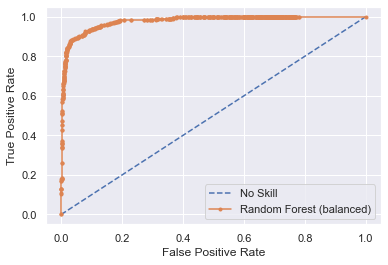

In [152]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = RF_balanced.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest (balanced)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### 8. Feature importance: Plot the feature importance graph and report the top 5 important features. Is your finding consistent with common sense?

In [153]:
features = list(X_train.columns)
features

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'notbizday',
 'weathersit',
 'temp',
 'hum',
 'windspeed']

In [154]:
importance = RF_balanced.feature_importances_
importance

array([0.0352991 , 0.16001634, 0.04702932, 0.44763097, 0.00322157,
       0.0305151 , 0.04063593, 0.01335764, 0.12799231, 0.06838661,
       0.0259151 ])

In [155]:
FIM = pd.DataFrame({'Features': features , 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
4,holiday,0.003222
7,weathersit,0.013358
10,windspeed,0.025915
5,weekday,0.030515
0,season,0.035299
6,notbizday,0.040636
2,mnth,0.047029
9,hum,0.068387
8,temp,0.127992
1,yr,0.160016


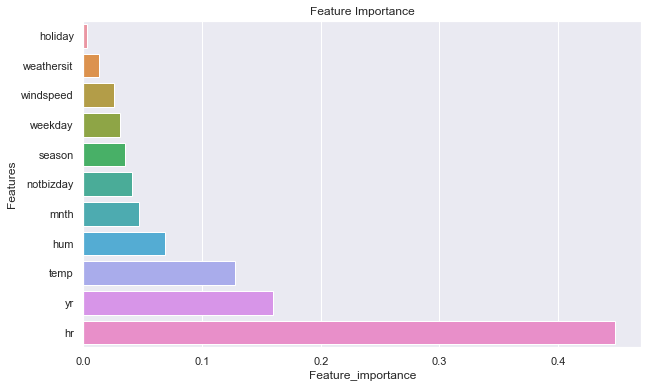

In [156]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

Hour, year, temperature, humidity, month and no-business-day are the 5 most important features. I think the findings are consistent with common sence. Different times of the day will have more or less people wanting to use a bike. Temperature and humidity will influence how many people want to be outside riding a bike. Month also makes sence, because it is correlated with temperature. 

### 9. Train 3 different boosting classifiers (AdaBoost, GBM and XGBoost) using their default model inputs. Compare the performance of the 3 boosting classifiers  with the vanilla Random Forest model (not optimized) by reporting the f1scores in the test set among the four models.

In [157]:
from sklearn.ensemble import RandomForestClassifier # we will be using RF as our benchmark.

In [158]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [159]:
from xgboost import XGBClassifier

In [160]:
%%time 
# Fitting RF classifier to the Training set
RF_classifier = RandomForestClassifier(random_state=rand_state)
RF_classifier.fit(X_train, y_train)

CPU times: user 758 ms, sys: 7.82 ms, total: 766 ms
Wall time: 765 ms


RandomForestClassifier(random_state=1000)

In [161]:
%%time
# Fitting AdaBoost classifier to the Training set
AdB_classifier = AdaBoostClassifier(random_state=rand_state)
AdB_classifier.fit(X_train, y_train)

CPU times: user 348 ms, sys: 2.49 ms, total: 350 ms
Wall time: 349 ms


AdaBoostClassifier(random_state=1000)

In [162]:
%%time 
# Fitting Gradient Boosting classifier to the Training set
GBM_classifier = GradientBoostingClassifier(random_state=rand_state)
GBM_classifier.fit(X_train, y_train)

CPU times: user 1.25 s, sys: 3.98 ms, total: 1.25 s
Wall time: 1.25 s


GradientBoostingClassifier(random_state=1000)

In [163]:
%%time
# # Fitting XGBoost classifier to the Training set
XGB_classifier = XGBClassifier(random_state=rand_state)
XGB_classifier.fit(X_train, y_train)

[20:05:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 3.99 s, sys: 312 ms, total: 4.3 s
Wall time: 567 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1000,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
y_hat_RF       = RF_classifier.predict(X_test)
y_hat_AdB      = AdB_classifier.predict(X_test)
y_hat_GBM      = GBM_classifier.predict(X_test)
y_hat_XGB      = XGB_classifier.predict(X_test)

In [165]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [166]:
print('RF  Accuracy = {}'.format(accuracy_score(y_test, y_hat_RF)))
print('AdB Accuracy = {}'.format(accuracy_score(y_test, y_hat_AdB)))
print('GBM Accuracy = {}'.format(accuracy_score(y_test, y_hat_GBM)))
print('XGB Accuracy = {}'.format(accuracy_score(y_test, y_hat_XGB)))

RF  Accuracy = 0.971614883007288
AdB Accuracy = 0.9495588799386268
GBM Accuracy = 0.9704641350210971
XGB Accuracy = 0.9800537015726889


In [167]:
print('RF  f1 = {}'.format(f1_score(y_test, y_hat_RF)))
print('AdB f1 = {}'.format(f1_score(y_test, y_hat_AdB)))
print('GBM f1 = {}'.format(f1_score(y_test, y_hat_GBM)))
print('XGB f1 = {}'.format(f1_score(y_test, y_hat_XGB)))

RF  f1 = 0.7921348314606741
AdB f1 = 0.603318250377074
GBM f1 = 0.7780979827089336
XGB f1 = 0.864935064935065


**Execution Speed ranked best to worst**

1. AdaBoost – 358 ms
2. XGBoost – 634 ms
3. Random Forest – 779 ms
4. GBM – 1.28 s

**Performance ranked best to worst**

1. XGBoost – Accuracy: 0.9800, F1: 0.8649
2. Random Forest – Accuracy: 0.9716, F1: 0.7921
3. GBM – Accuracy: 0.9705, F1: 0.7781
4. AdaBoost – Accuracy: 0.9495, F1: 0.6033 

**Overall Winner**

Overall, the winner is XGBoost because it has the highest performance and it is one of the fastest models!

In [168]:
!jupyter nbconvert --to html HW11.ipynb

[NbConvertApp] Converting notebook HW11.ipynb to html
[NbConvertApp] Writing 895529 bytes to HW11.html
